In [13]:
import numpy as np 
import pandas as pd
import mygene
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#Getting list of genes which have SNPs according to IGAP_stage1
def SummaryGWAS(FileName,sep=' '):

    cnt = 0 
    GeneNames = []
    MinPval = []
    AvgLogPval = []
    with open(FileName) as f:
        for line in f:
            if cnt <= 1:
                cnt+=1 
                continue

            cnt += 1
            temp = line.split(sep)

            if len(temp)>9:
                GeneNames += [temp[0]]
                temp = map(float,temp[9:])
                MinPval += [min(temp)]
                AvgLogPval += [np.mean(np.log10(temp))]
                
    df = pd.DataFrame(data = {'Names':GeneNames,'Min':MinPval,'Mean':AvgLogPval})
    return(df)


In [15]:
#FileName = '/Users/sumitmukherjee/Documents/AMP-AD_Network_Analysis/IGAP_files/IGAP_geneAnalysis.genes.raw'
FileName = '/Users/sumitmukherjee/Documents/DriverPrediction/DataFiles/Jensen_geneAnalysis.genes.raw'
#FileName = 'ADSP_outfile10k.txt'
df = SummaryGWAS(FileName,sep=' ')
df.head()


,Mean,Min,Names
0,-0.131461,0.738821,NOC2L
1,-0.077758,0.699010,KLHL17
2,-0.121490,0.612247,PLEKHN1
3,-0.262182,0.357791,PERM1
4,-0.522686,0.142306,HES4


(array([  12.,  347., 2234., 4685., 7865., 2531.,  402.,  142.,   48.,
          23.]),
 array([-3.53390431, -3.18199365, -2.83008299, -2.47817232, -2.12626166,
        -1.774351  , -1.42244034, -1.07052968, -0.71861902, -0.36670835,
        -0.01479769]),
 <a list of 10 Patch objects>)

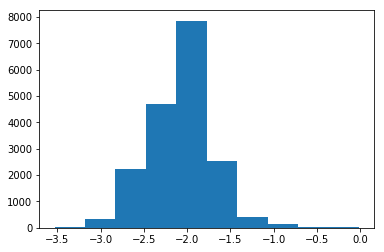

In [49]:
plt.hist(df['Mean'])

In [16]:
np.mean(df['Mean'])

-0.12386765879160043

In [43]:
3>None

True

In [6]:
min(df['Min'])

3.96818e-06

In [17]:
#Getting list of genes which have SNPs according to IGAP_stage1
def SummaryGWAS2(FileName,Pv,sep=' '):
    
    cnt = 0 
    GeneNames = []
    MinPval = []
    Num = []
    AvgLogPval = []
    with open(FileName) as f:
        for line in f:
            if cnt <= 1:
                cnt+=1 
                continue

            cnt += 1
            line = line[:-1]
            temp = line.split(sep)
            
            if len(temp)>2:
                GeneNames += [temp[0]]
                mykeys = temp[2:]
                tmp = [Pv[x] for x in mykeys]
                if temp[0] == 'CD74':
                    print(tmp)

                tmp2 = [max(2e-308,x) for x in tmp]
                MinPval += [min(tmp2)]
                Num +=[len(tmp2)]
                AvgLogPval += [np.mean(np.log10(tmp2))]
                
    df = pd.DataFrame(data = {'Names':GeneNames,'Min':MinPval,'Mean':AvgLogPval, 'Num':Num})
    return(df)


In [28]:
#FileName = '/Users/sumitmukherjee/Documents/AMP-AD_Network_Analysis/IGAP_files/IGAP_geneAnalysis.genes.raw'
FileName = '/Users/sumitmukherjee/Documents/DriverPrediction/DataFiles/testOutIGAP.genes.annot' #for IGAP
#FileName = '/Users/sumitmukherjee/Documents/DriverPrediction/DataFiles/testOut10.genes.annot' #for jansen
#FileName = 'ADSP_outfile10k.txt'
Pv = pd.read_table('../DataFiles/IGAP_pval.txt')
#Pv = pd.read_table('../DataFiles/Jensen_pval.txt')
Pv2 = Pv.set_index('SNP').to_dict()

In [29]:
df = SummaryGWAS2(FileName,Pv2['P'],sep='\t')
df.head()

[0.7685, 0.8391, 0.7657, 0.7908, 0.8604, 0.8412, 0.2109, 0.442, 0.1942, 0.8322, 0.301, 0.8091, 0.7766, 0.8227, 0.8874, 0.8214, 0.3162, 0.9392, 0.7541, 0.7836, 0.93, 0.9723, 0.7537, 0.2268, 0.8412, 0.9154, 0.4508, 0.7322, 0.7968, 0.8129, 0.7674, 0.7498, 0.3678, 0.9298, 0.6483, 0.7303, 0.3738, 0.4652, 0.8719, 0.21100000000000002, 0.9984, 0.6076, 0.6065, 0.3517, 0.2453, 0.1701, 0.2, 0.22399999999999998, 0.3414, 0.8827, 0.3276, 0.8059999999999999, 0.1198, 0.8463, 0.4544, 0.4358, 0.433, 0.2137, 0.6038, 0.1372, 0.18899999999999997, 0.1234, 0.6012, 0.539, 0.1962, 0.8267, 0.6528, 0.6524, 0.6519, 0.1395, 0.6505, 0.6466]


,Mean,Min,Names,Num
0,-0.380695,0.348300,SAMD11,6
1,-0.610730,0.133800,HES4,10
2,-0.492920,0.133800,ISG15,30
3,-0.648698,0.016870,AGRN,50
4,-0.911167,0.007672,RNF223,45


In [31]:
df.to_csv('IGAP_gene_summary2.csv')

In [8]:
min(df['Min'])

2e-308

(-10, 0)

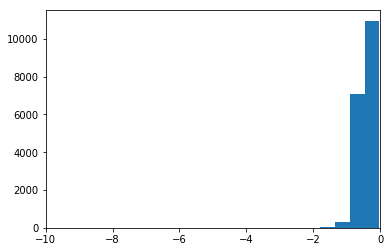

In [18]:
plt.hist(df.Mean,200)
plt.xlim([-10,0])

In [24]:
a = [np.array([1,2]),np.array([2,1]),np.array([3,1])]

for b in a:
    print(b)

[1 2]
[2 1]
[3 1]


In [25]:
sum(a)

array([6, 4])

In [6]:
Y = np.array([0,1,1,0,0])
bla = np.argwhere(Y==1)

In [12]:
len(bla)

2

In [21]:
df.head()

,Mean,Min,Names,Num
0,-0.416023,0.000484,SAMD11,308
1,-0.483331,0.000685,NOC2L,228
2,-0.520841,0.000049,KLHL17,180
3,-0.566113,0.000049,PLEKHN1,195
4,-0.521383,0.000049,PERM1,172


In [30]:
min(df.Num)

1